Source: https://www.ig.com/uk/trading-strategies/macd-trading-strategy-190610

In [266]:
import pandas_datareader as pdr
import datetime
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [267]:
#define backtest range
START = datetime.datetime(2000, 1, 1)
END = datetime.datetime(2020, 1, 1)
YEARS = (END - START).days / 365.25

In [268]:
#define starting variables
STARTING_BALANCE = 10000

In [269]:
#download data
price = pdr.get_data_yahoo('^GSPC', START, END)

price.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


In [270]:
#remove columns
price = price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], 1)

price.tail()

,Close
Date,
2019-12-24,3223.379883
2019-12-26,3239.909912
2019-12-27,3240.020020
2019-12-30,3221.290039
2019-12-31,3230.780029


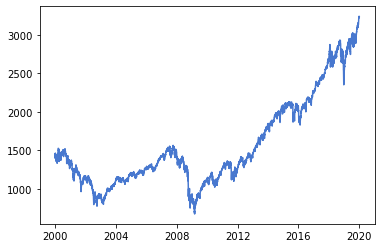

In [271]:
#plot chart
plt.style.use('seaborn-muted')
plt.plot(price.Close)
plt.show()

In [272]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)
price.Return.iat[0] = 1
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price

,Close,Return,Bench_Bal
Date,,,
2000-01-03,1455.219971,1.000000,10000.000000
2000-01-04,1399.420044,0.961655,9616.553319
2000-01-05,1402.109985,1.001922,9635.038094
2000-01-06,1403.449951,1.000956,9644.246089
2000-01-07,1441.469971,1.027090,9905.512567
...,...,...,...
2019-12-24,3223.379883,0.999805,22150.464862
2019-12-26,3239.909912,1.005128,22264.056138
2019-12-27,3240.020020,1.000034,22264.812776


In [273]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)

bench_dd

-56.78

In [274]:
#calculate MACD
exp1 = price.Close.ewm(span = 12, adjust=False).mean()
exp2 = price.Close.ewm(span = 26, adjust=False).mean()

macd = exp1 - exp2
signal = macd.ewm(span = 9, adjust=False).mean()

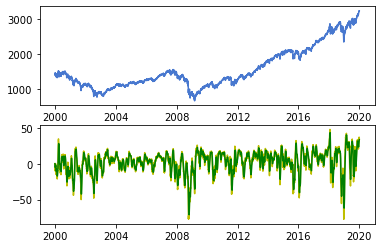

In [275]:
plt.figure()

#create subplot for price data
plt.subplot(211)
plt.plot(price.Close)

#create subplot for MACD
plt.subplot(212)
plt.plot(macd, color = 'y')
plt.plot(signal, color = 'g')

#show plot
plt.show()

In [276]:
#add column for entries
price['Long'] = macd > signal

price.tail()

,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long
Date,,,,,,
2019-12-24,3223.379883,0.999805,22150.464862,22154.794977,-4.330115,True
2019-12-26,3239.909912,1.005128,22264.056138,22264.056138,0.000000,True
2019-12-27,3240.020020,1.000034,22264.812776,22264.812776,0.000000,True
2019-12-30,3221.290039,0.994219,22136.103846,22264.812776,-128.708930,True
2019-12-31,3230.780029,1.002946,22201.317288,22264.812776,-63.495488,True


In [277]:
#calculate system return and balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price

,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,
2000-01-03,1455.219971,1.000000,10000.000000,10000.000000,0.000000,False,1.000000,10000.000000
2000-01-04,1399.420044,0.961655,9616.553319,10000.000000,-383.446681,False,1.000000,10000.000000
2000-01-05,1402.109985,1.001922,9635.038094,10000.000000,-364.961906,False,1.000000,10000.000000
2000-01-06,1403.449951,1.000956,9644.246089,10000.000000,-355.753911,False,1.000000,10000.000000
2000-01-07,1441.469971,1.027090,9905.512567,10000.000000,-94.487433,False,1.000000,10000.000000
...,...,...,...,...,...,...,...,...
2019-12-24,3223.379883,0.999805,22150.464862,22154.794977,-4.330115,True,0.999805,13875.239536
2019-12-26,3239.909912,1.005128,22264.056138,22264.056138,0.000000,True,1.005128,13946.394077
2019-12-27,3240.020020,1.000034,22264.812776,22264.812776,0.000000,True,1.000034,13946.868041


In [278]:
#calculate system drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((price.Sys_DD / price.Sys_Peak).min() * 100, 2)

sys_dd

-35.01

In [279]:
#calculate metrics
bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
sys_ret = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}%')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_ret}%')
print(f'System CAGR: {sys_cagr}%')
print(f'System DD: {sys_dd}%')

Benchmark Total return: 122.01%
Benchmark CAGR: 4.07%
Benchmark DD: -56.78%

System Total return: 39.07%
System CAGR: 1.66%
System DD: -35.01%


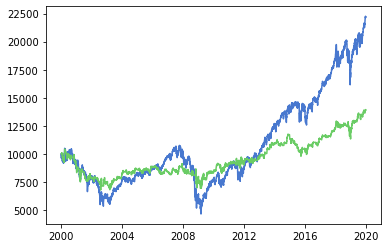

In [280]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal)

plt.show()

In [281]:
#define list of ETFs to backtest
symbols = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^N225']

In [282]:
#create backtesting function
def backtest(symbol):
    #download data
    price = pdr.get_data_yahoo(symbol, START, END)
    
    #remove columns
    price = price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], 1)
    
    #calculate daily return
    price['Return'] = price.Close / price.Close.shift(1)
    price.Return.iat[0] = 1
    price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()
    
    #calculate drawdown
    price['Bench_Peak'] = price.Bench_Bal.cummax()
    price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak
    
    #calculate MACD
    exp1 = price.Close.ewm(span=12, adjust=False).mean()
    exp2 = price.Close.ewm(span=26, adjust=False).mean()

    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    
    #add column for long entries based on MACD signal
    price['Long'] = macd > signal
    
    #calculate system return and balance
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    
    #calculate system drawdown
    price['Sys_Peak'] = price.Sys_Bal.cummax()
    price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak
    
    #calculate metrics
    bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
    bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
    bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)
    sys_return = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
    sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)
    sys_dd = round(((price.Sys_DD / price.Sys_Peak).min()) * 100, 2)
    
    return bench_cagr, sys_cagr

In [283]:
#backtest multiple symbols
bc = []
sc = []


for symbol in symbols:
    bench_cagr, sys_cagr = backtest(symbol)
    bc.append(bench_cagr)
    sc.append(sys_cagr)

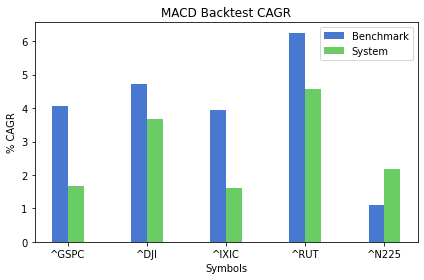

In [284]:
#plot data
x_indices = np.arange(len(symbols))
width = 0.2

plt.bar(x_indices - width / 2, bc, width = width, label = 'Benchmark')
plt.bar(x_indices + width / 2, sc, width = width, label = 'System')
   
plt.xticks(ticks = x_indices, labels = symbols)

plt.legend()

plt.title('MACD Backtest CAGR')
plt.xlabel('Symbols')
plt.ylabel('% CAGR')
plt.tight_layout()

plt.show()